In [183]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import os
from sklearn.preprocessing import LabelEncoder
le_employement = LabelEncoder()
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
os.chdir('/Users/admin/Desktop/AXA')
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
)

In [185]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [187]:
df=pd.read_csv('depression_data.csv')
df.drop(columns = ["Name"], inplace = True)

In [199]:
df4=df[df['Income']<20000]

In [201]:
df4['Employment Status'].value_counts()

Employment Status
Unemployed    98435
Name: count, dtype: int64

In [7]:
def age_encoder(data):
    age_mapping = {
        'Under 18':1,
        '18-35':2,
        '36-50':3,
        '51-65':4,
        '65+':5}
    return age_mapping.get(data, 0)

In [157]:
df2=df.copy()
df2['Age_bin'] = pd.cut(df['Age'], bins=[-np.inf, 18, 35, 50, 65, np.inf], labels=['Under 18', '18-35', '36-50', '51-65', '65+'])
df2['Income_bin'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Medium', 'High'])

In [159]:
df2.drop(columns=["Age"],inplace=True)      
df2.drop(columns=["Income"],inplace=True)

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


In [163]:
from wolta.data_tools import col_types
types = col_types(X, print_columns=True)

Marital Status: int64
Number of Children: int64
Smoking Status: int64
Physical Activity Level: int64
Employment Status: int64
Alcohol Consumption: int64
Dietary Habits: int64
Sleep Patterns: int64
Family History of Depression: int64
Chronic Medical Conditions: int64
Age_bin: int64
Income_bin: int64


In [33]:
for column in df2.columns:
    if df2[column].dtype == 'str':
        df2[column] = df2[column].astype('object')

In [41]:
#THROW AWAY SUBSTANCE
from scipy.stats import chi2_contingency
from statsmodels.stats.contingency_tables import Table

categorical= df2.select_dtypes(include='object').drop(columns=["History of Mental Illness"])
ordinal_columns =['Education Level','Physical Activity Level','Alcohol Consumption','Dietary Habits','Sleep Patterns','Income_bin','Age_bin']

for column in categorical.columns:
    if column not in ordinal_columns:
        data = pd.crosstab(df2[column],df2['History of Mental Illness'])
        contingency_table = Table(data.values)
        chi_square_test = contingency_table.test_nominal_association()
        print(f"The p-value CHI score for {column} and Mental Illness",chi_square_test)
    else:
        data = pd.crosstab(df2[column], df2['History of Mental Illness'])
        contingency_table = Table(data.values)
        chi_square_test = contingency_table.test_ordinal_association()
        print(f"Chi-Square Ordinal for {column} and Mental Illness: {chi_square_test}")

The p-value CHI score for Marital Status and Mental Illness df          3
pvalue      5.4067861299245124e-14
statistic   64.84684614908478
Chi-Square Ordinal for Education Level and Mental Illness: null_mean   197804.10828048567
null_sd     328.29644252341944
pvalue      3.6243049622434263e-34
statistic   193803.0
zscore      -12.187485949380175
The p-value CHI score for Smoking Status and Mental Illness df          2
pvalue      0.0032730141384532674
statistic   11.444087927498943
Chi-Square Ordinal for Physical Activity Level and Mental Illness: null_mean   155609.6368617196
null_sd     221.8488471584965
pvalue      3.590543897480623e-08
statistic   156832.0
zscore      5.509891775128779
The p-value CHI score for Employment Status and Mental Illness df          1
pvalue      0.0
statistic   8198.609285236693
Chi-Square Ordinal for Alcohol Consumption and Mental Illness: null_mean   147829.9608717929
null_sd     235.40591774838657
pvalue      1.3462484820865858e-15
statistic   145949.

In [49]:
df2.columns

Index(['Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions', 'Age_bin',
       'Income_bin'],
      dtype='object')

In [51]:
X = df2.drop(columns=["History of Substance Abuse","Education Level","History of Mental Illness"])
y = df2["History of Mental Illness"]

In [ ]:
from wolta.data_tools import make_numerics
types = col_types(X)
loc = 0
for col in X.columns:
    if types[loc] == 'str':
        X[col] = make_numerics(X[col])
    loc += 1

In [71]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_gvif(X):
    gvif = np.array([variance_inflation_factor(X.values, i) for i in range(X.shape[1])])
    gvif_df = pd.DataFrame({'Variable': X.columns, 'GVIF': gvif})
    return gvif_df

# Calculate initial GVIF
gvif_df = calculate_gvif(X)

# Loop to remove columns with GVIF > 5
while gvif_df['GVIF'].max() > 5:
    # Find the column with the highest GVIF
    max_vif_col = gvif_df.loc[gvif_df['GVIF'].idxmax(), 'Variable']

    # Remove the column with the highest GVIF
    X = X.drop(max_vif_col, axis=1)

    # Recalculate GVIF
    gvif_df = calculate_gvif(X)

# Final GVIF results
print("Final GVIF after removing high VIF columns:")
print(gvif_df)

Final GVIF after removing high VIF columns:
                        Variable      GVIF
0                 Marital Status  1.761741
1             Number of Children  2.438140
2                 Smoking Status  1.599817
3        Physical Activity Level  3.291069
4              Employment Status  2.813916
5            Alcohol Consumption  2.014244
6                 Dietary Habits  2.073463
7                 Sleep Patterns  1.883361
8   Family History of Depression  3.218945
9     Chronic Medical Conditions  2.770493
10                       Age_bin  2.424284
11                    Income_bin  2.771908


In [75]:
X.shape

(413768, 12)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Assuming X_train and y_train are already defined

# Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print("Oversampling: ", y_res.value_counts())
# Store oversampling results in variables 
X_train_oversampled = X_res  
y_train_oversampled = y_res  

# Undersampling
un = RandomUnderSampler(random_state=42)
X_under, y_under = un.fit_resample(X_train, y_train)
print("Undersampling: ", y_under.value_counts())
# Store undersampling results in variables 
X_train_undersampled = X_under  
y_train_undersampled = y_under  

# Random Sampling
train_data = pd.concat([X_train, y_train], axis=1)
yes_class = train_data[train_data['History of Mental Illness'] == 'Yes']  # Assuming 1 for 'yes'
no_class = train_data[train_data['History of Mental Illness'] == 'No']   # Assuming 0 for 'no'

# Randomly sample 1000 instances from each class
yes_sample = yes_class.sample(n=1000, random_state=42)
no_sample = no_class.sample(n=1000, random_state=42)

# Combine the samples back together
balanced_train_data = pd.concat([yes_sample, no_sample])

# Shuffle the dataset
balanced_train_data = balanced_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the data back into X and y
X_train_rand = balanced_train_data.drop('History of Mental Illness', axis=1)
y_train_rand = balanced_train_data['History of Mental Illness']

print("Random Sampling =: ", y_train_rand.value_counts())
# Store random sampling results in variables 
X_train_random = X_train_rand  
y_train_random = y_train_rand  

Oversampling:  History of Mental Illness
No     201624
Yes    201624
Name: count, dtype: int64
Undersampling:  History of Mental Illness
No     88013
Yes    88013
Name: count, dtype: int64
Random Sampling =:  History of Mental Illness
No     1000
Yes    1000
Name: count, dtype: int64


In [105]:
y_res.value_counts()

History of Mental Illness
No     201624
Yes    201624
Name: count, dtype: int64

In [131]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_under)
X_test_scaled = min_max_scaler.transform(X_test)

from sklearn.feature_selection import SelectKBest, f_classif,chi2
KBest = SelectKBest(chi2, k=9)  # Select top 10 features
#f = KBest.get_support(2) #the most important features
X_train_selected = KBest.fit_transform(X_train_scaled, y_under)
X_test_selected = KBest.transform(X_test_scaled)

In [127]:

#With Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pandas as pd


best_params_svm = {'C': 0.1, 'kernel': 'linear'}  # Obtained from running last time


def train_evaluate_svm(X_train, y_train, X_test, y_test, trial_name):

    
    # Parameter grid yang disederhanakan untuk percepatan
    param_grid = {
        'C': [0.1, 1],               
        'kernel': ['linear'],         
    }

    # GridSearchCV dengan parameter yang dioptimalkan
    grid_search = GridSearchCV(SVC(random_state=42), param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Model terbaik
    best_svm = grid_search.best_estimator_
    print(f"Best Parameters for {trial_name}: {grid_search.best_params_}")
    
    # Use predefined best parameters
    best_svm = SVC(**best_params_svm, random_state=42) 
    best_svm.fit(X_train, y_train)

# Evaluasi model
    y_train_pred = best_svm.predict(X_train)
    y_test_pred = best_svm.predict(X_test)
    balanced_acc_train = balanced_accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    balanced_acc_test = balanced_accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Plot confusion matrix
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=["No Mental Illness", "Mental Illness"],
                yticklabels=["No Mental Illness", "Mental Illness"])
    plt.title(f'Confusion Matrix - {trial_name} (Test Data)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return best_svm, balanced_acc_train, f1_train, balanced_acc_test, f1_test

print("Non-PCA Trial: Regular")
best_svm, train_bal_acc, train_f1, test_bal_acc, test_f1 = train_evaluate_svm(X_train, y_train, X_test, y_test, "Regular")
print(f"Train Balanced Acc: {train_bal_acc}, Train F1 Score: {train_f1}, Test Balanced Acc: {test_bal_acc}, Test F1 Score: {test_f1}")


if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Pilih subset 100 sampel secara acak dari X_test
subset_X_test = X_test.sample(100, random_state=42) 


explainer = shap.KernelExplainer(best_svm.predict, X_train)
shap_values = explainer.shap_values(subset_X_test)

# Plot SHAP Summary (Bar)
shap.summary_plot(shap_values, subset_X_test, plot_type="bar", show=False)


plt.gcf().set_size_inches(8, 6)
plt.show()

Non-PCA Trial: Regular


KeyboardInterrupt: 

In [11]:
df.nunique()

Age                                 63
Marital Status                       4
Education Level                      5
Number of Children                   5
Smoking Status                       3
Physical Activity Level              3
Employment Status                    2
Income                          405282
Alcohol Consumption                  3
Dietary Habits                       3
Sleep Patterns                       3
History of Mental Illness            2
History of Substance Abuse           2
Family History of Depression         2
Chronic Medical Conditions           2
dtype: int64

In [15]:
df.isnull().sum()

Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64

In [352]:
all_ages = df2['Age'].unique()
all_ages.sort()
all_ages

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [310]:
bins = [0]+[i for i in range(20,81,5)]
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]
df['Age_Bucket'] = pd.cut(df['Age'],bins=bins,labels=labels)
print(bins)
print(labels)

[0, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
['0 - 20', '20 - 25', '25 - 30', '30 - 35', '35 - 40', '40 - 45', '45 - 50', '50 - 55', '55 - 60', '60 - 65', '65 - 70', '70 - 75', '75 - 80']


<Axes: xlabel='Age_Bucket', ylabel='Count'>

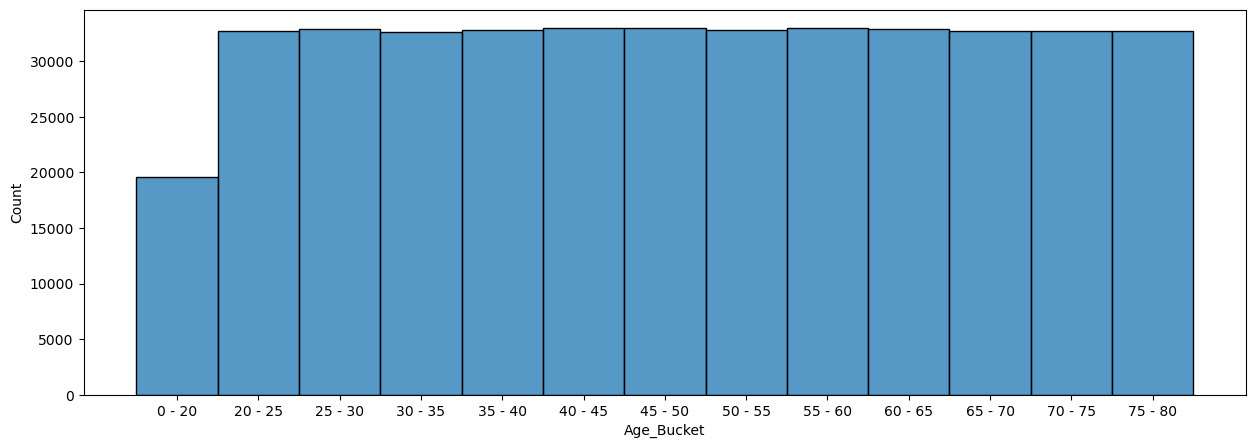

In [312]:
buck = df[['Age', 'Age_Bucket']].sort_values('Age')
fig = plt.figure(figsize = (15,5))
sns.histplot(buck['Age_Bucket'])
plt.show()

([<matplotlib.patches.Wedge at 0x136feee70>,
 [Text(-0.9917216958655181, 0.47590763594380475, '55 - 60'),
  Text(-1.0984018100561685, -0.059274477351830834, '45 - 50'),
  Text(-0.9348003349235029, -0.5797830058107144, '40 - 45'),
  Text(-0.5416474835679623, -0.9574016939323295, '60 - 65'),
  Text(-0.016080526224518988, -1.0998824558453246, '25 - 30'),
  Text(0.5128952233472405, -0.9731076455704089, '35 - 40'),
  Text(0.9161405934541822, -0.6088402196187593, '50 - 55'),
  Text(1.0957109898229096, -0.09704342729571927, '70 - 75'),
  Text(1.0092854015688832, 0.4374276833717066, '20 - 25'),
  Text(0.6786378806994436, 0.865708164960784, '65 - 70'),
  Text(0.18418517088325753, 1.08447029596329, '75 - 80'),
  Text(-0.35414273023128995, 1.0414331119300595, '30 - 35'),
  Text(-0.728700950135522, 0.8240114837012816, '0 - 20')],
 [Text(-0.5409391068357371, 0.2595859832420753, '8.0%'),
  Text(-0.5991282600306373, -0.032331533100998636, '8.0%'),
  Text(-0.5098910917764561, -0.3162452758967533, '8.0

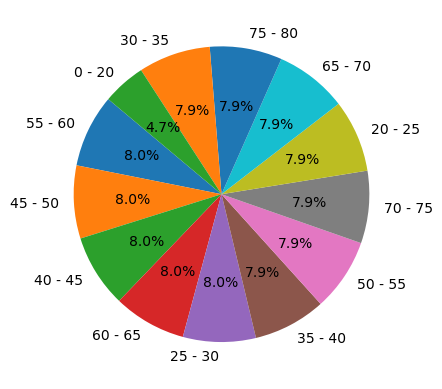

In [314]:
counts = buck['Age_Bucket'].value_counts()
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

#Result:
#data seems balanced across all age groups, 0-20 is a bit lacks because there are only three ages in that, 18, 19, 20 so we can't draw any conclusions that ties depression with age

In [316]:
bins = [0]+[i for i in range(20000,210000,10000)]
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]
df['Income_Bucket'] = pd.cut(df['Income'],bins=bins,labels=labels)
print(bins)
print(labels)

[0, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000]
['0 - 20000', '20000 - 30000', '30000 - 40000', '40000 - 50000', '50000 - 60000', '60000 - 70000', '70000 - 80000', '80000 - 90000', '90000 - 100000', '100000 - 110000', '110000 - 120000', '120000 - 130000', '130000 - 140000', '140000 - 150000', '150000 - 160000', '160000 - 170000', '170000 - 180000', '180000 - 190000', '190000 - 200000']


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

<Axes: xlabel='Income_Bucket', ylabel='Count'>

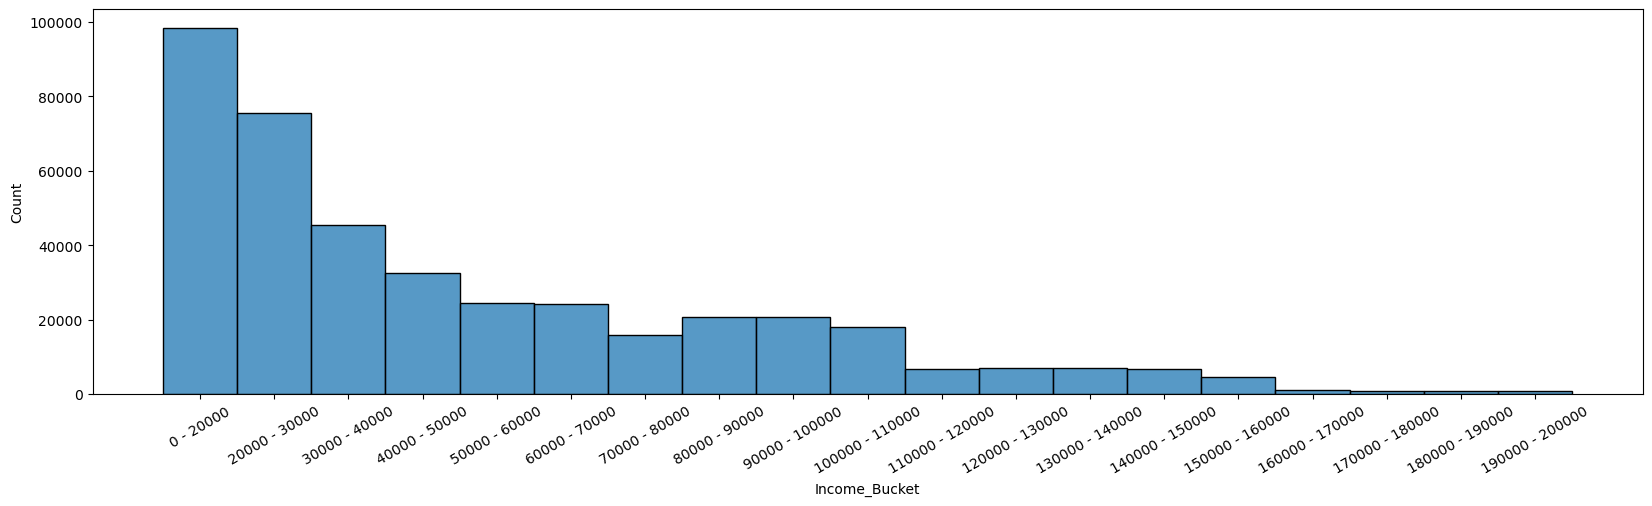

In [318]:
buck = df[['Income', 'Income_Bucket']].sort_values('Income')
fig = plt.figure(figsize = (20,5))
plt.xticks(rotation=30)
sns.histplot(buck['Income_Bucket'])
plt.show()

up_mid = df[(df['Income']>=80000) & (df['Income']<=101000)]
#Result:
# Well the average income of a US citizen is ~$60000 with that as a baseline, it is safe to say the poorer you are the more likely you are going to be depressed but the trend seems to continue quite heavily even into upper middle class reasons to which we are yet to find out.

In [354]:
from wolta.data_tools import col_types
types = col_types(df2, print_columns=True)

Age: int64
Marital Status: str
Education Level: str
Number of Children: int64
Smoking Status: str
Physical Activity Level: str
Employment Status: str
Income: float64
Alcohol Consumption: str
Dietary Habits: str
Sleep Patterns: str
History of Mental Illness: str
History of Substance Abuse: str
Family History of Depression: str
Chronic Medical Conditions: str
Age_bin: str
Income_bin: str


In [165]:
from wolta.data_tools import make_numerics
types = col_types(df2)
loc = 0
for col in df2.columns:
    if types[loc] == 'str':
        df2[col] = make_numerics(df2[col])
    loc += 1

In [167]:
X = df2.drop('History of Mental Illness', axis=1)
y = df2['History of Mental Illness']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [179]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

from sklearn.feature_selection import SelectKBest, f_classif,chi2
KBest = SelectKBest(chi2, k=14)  # Select top 10 features
#f = KBest.get_support(2) #the most important features
X_train_selected = KBest.fit_transform(X_train_scaled, y_train)
X_test_selected = KBest.transform(X_test_scaled)

In [1]:
# Compute class weights    
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

clf = Pipeline([
    ('kernel', Nystroem(kernel='rbf', n_components=15, random_state=42)),
    ('sgd', SGDClassifier(penalty="elasticnet", 
                          alpha=0.0001, l1_ratio=0.15,
                          max_iter=1000, tol=1e-3, 
                          class_weight=class_weight_dict,
                          random_state=42))
])
# Fit the classifier
clf.fit(X_train_selected, y_train)
# Make predictions
y_pred = clf.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_pred))
print('The weighted f1 score for the testing data:', f1)

NameError: name 'compute_class_weight' is not defined

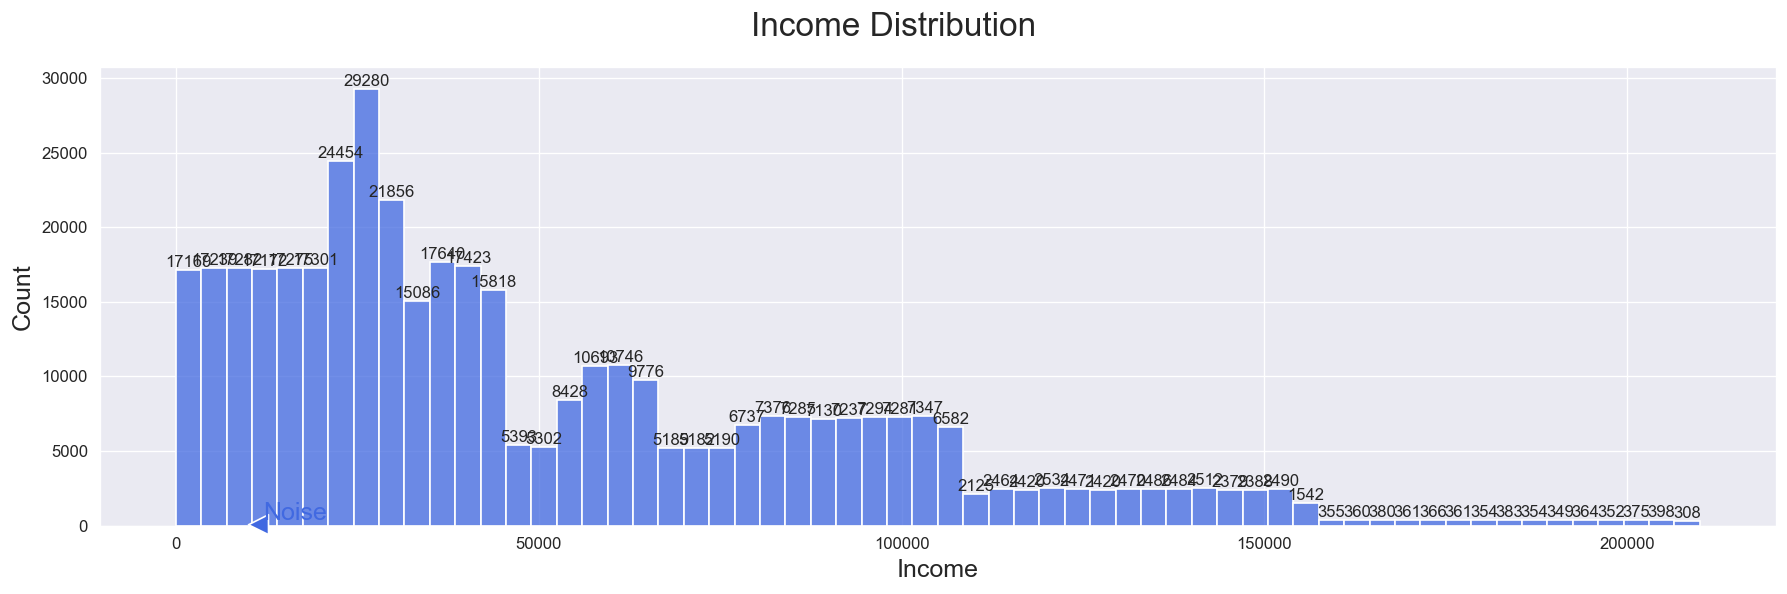

In [149]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='Income', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('Income', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('Income Distribution', fontsize=20)
plt.tight_layout()
plt.show()